In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_rows = 4000

In [2]:
data = pd.read_csv("data/data_for_analysis.csv")
# Remove sign
data['IntensityMeanAbsVelocity'] = np.abs(data['IntensityMeanAbsVelocity'])

In [3]:
data.head()

,author_last_name,author_first_name,recording_url,birth_year,spoken_word,cave_canem,region,city_of_birth,state,country,...,PauseCount,PauseRate,PauseDutyCycle,MeanPauseDuration,ComplexityAllPauses,ComplexitySyllables,ComplexityPhrases,IntensitySegmentMeanSD,IntensityMeanAbsVelocity,IntensityMeanAbsAccel
0,Adams,Samantha,NaN,NaN,False,False,Midwest,NaN,Wisconsin,NaN,...,66.0,1.346801,0.487093,0.361667,9.739216,15.261978,4.193274,13.801149,149.186800,120.134374
1,Adams,Samantha,NaN,NaN,False,False,Midwest,NaN,Wisconsin,NaN,...,110.0,0.826322,0.400841,0.485091,6.404722,14.183274,3.091935,14.306229,159.312214,132.202711
2,Adisa,Opal Palmer,NaN,1954.0,False,True,Caribbean,Kingston,NaN,Jamaica,...,130.0,0.921430,0.281922,0.305962,6.968303,13.079815,2.672056,4.096043,277.537265,305.414392
3,Adisa,Opal Palmer,NaN,1954.0,False,True,Caribbean,Kingston,NaN,Jamaica,...,29.0,0.607203,0.268844,0.442759,5.259354,12.131653,2.768081,3.458940,191.883661,196.840812
4,Alexander,Elizabeth,NaN,1962.0,False,True,Northeast,Harlem,New York,USA,...,217.0,0.692450,0.252505,0.364654,5.517232,13.599243,2.288253,3.513307,205.459264,210.177286


In [4]:
measurement_columns = data.columns[26:]

This is just the histogram of the raw measurements. I am just trying to literally look at the data to see if there is anything interesting going on.

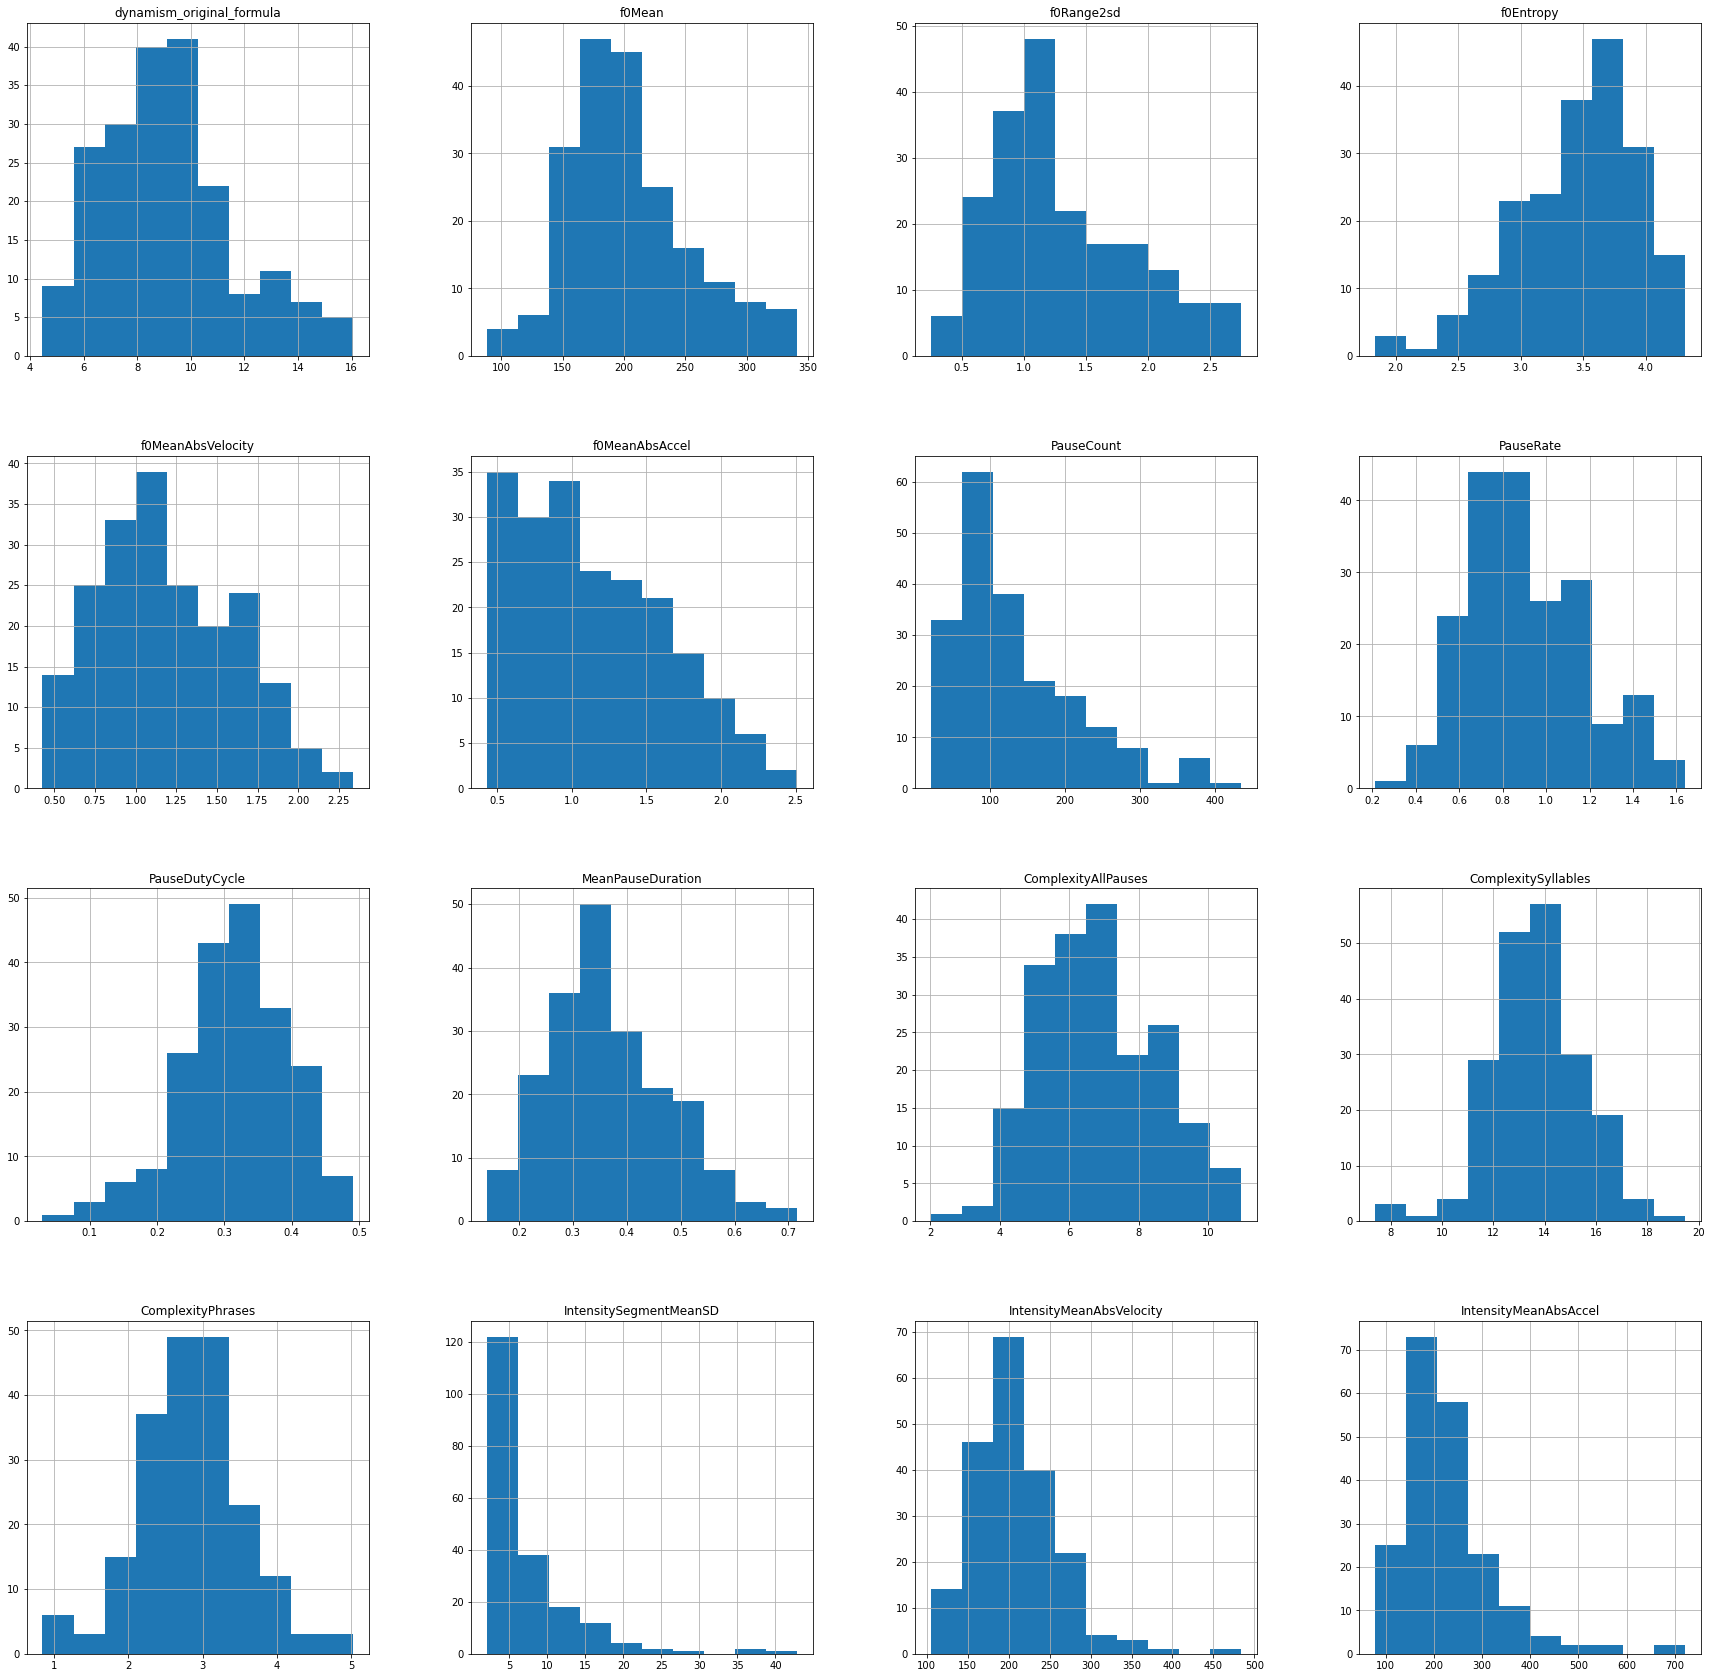

In [5]:
data[measurement_columns].hist(figsize=(30, 30));

The following matrix scatter plot is to see the relationship between measurements. Three measurements pairs appear to have strong correlation. They are "PauseRate" & "ComplexityAllPauses", dyanmism & "f0Range2sd", and "IntesnsityMeanAbsVelocity" & "IntesnsityMeanAbsAccel". The first pair is almost perfectly correlated, so in the future, consider only keep one of them.

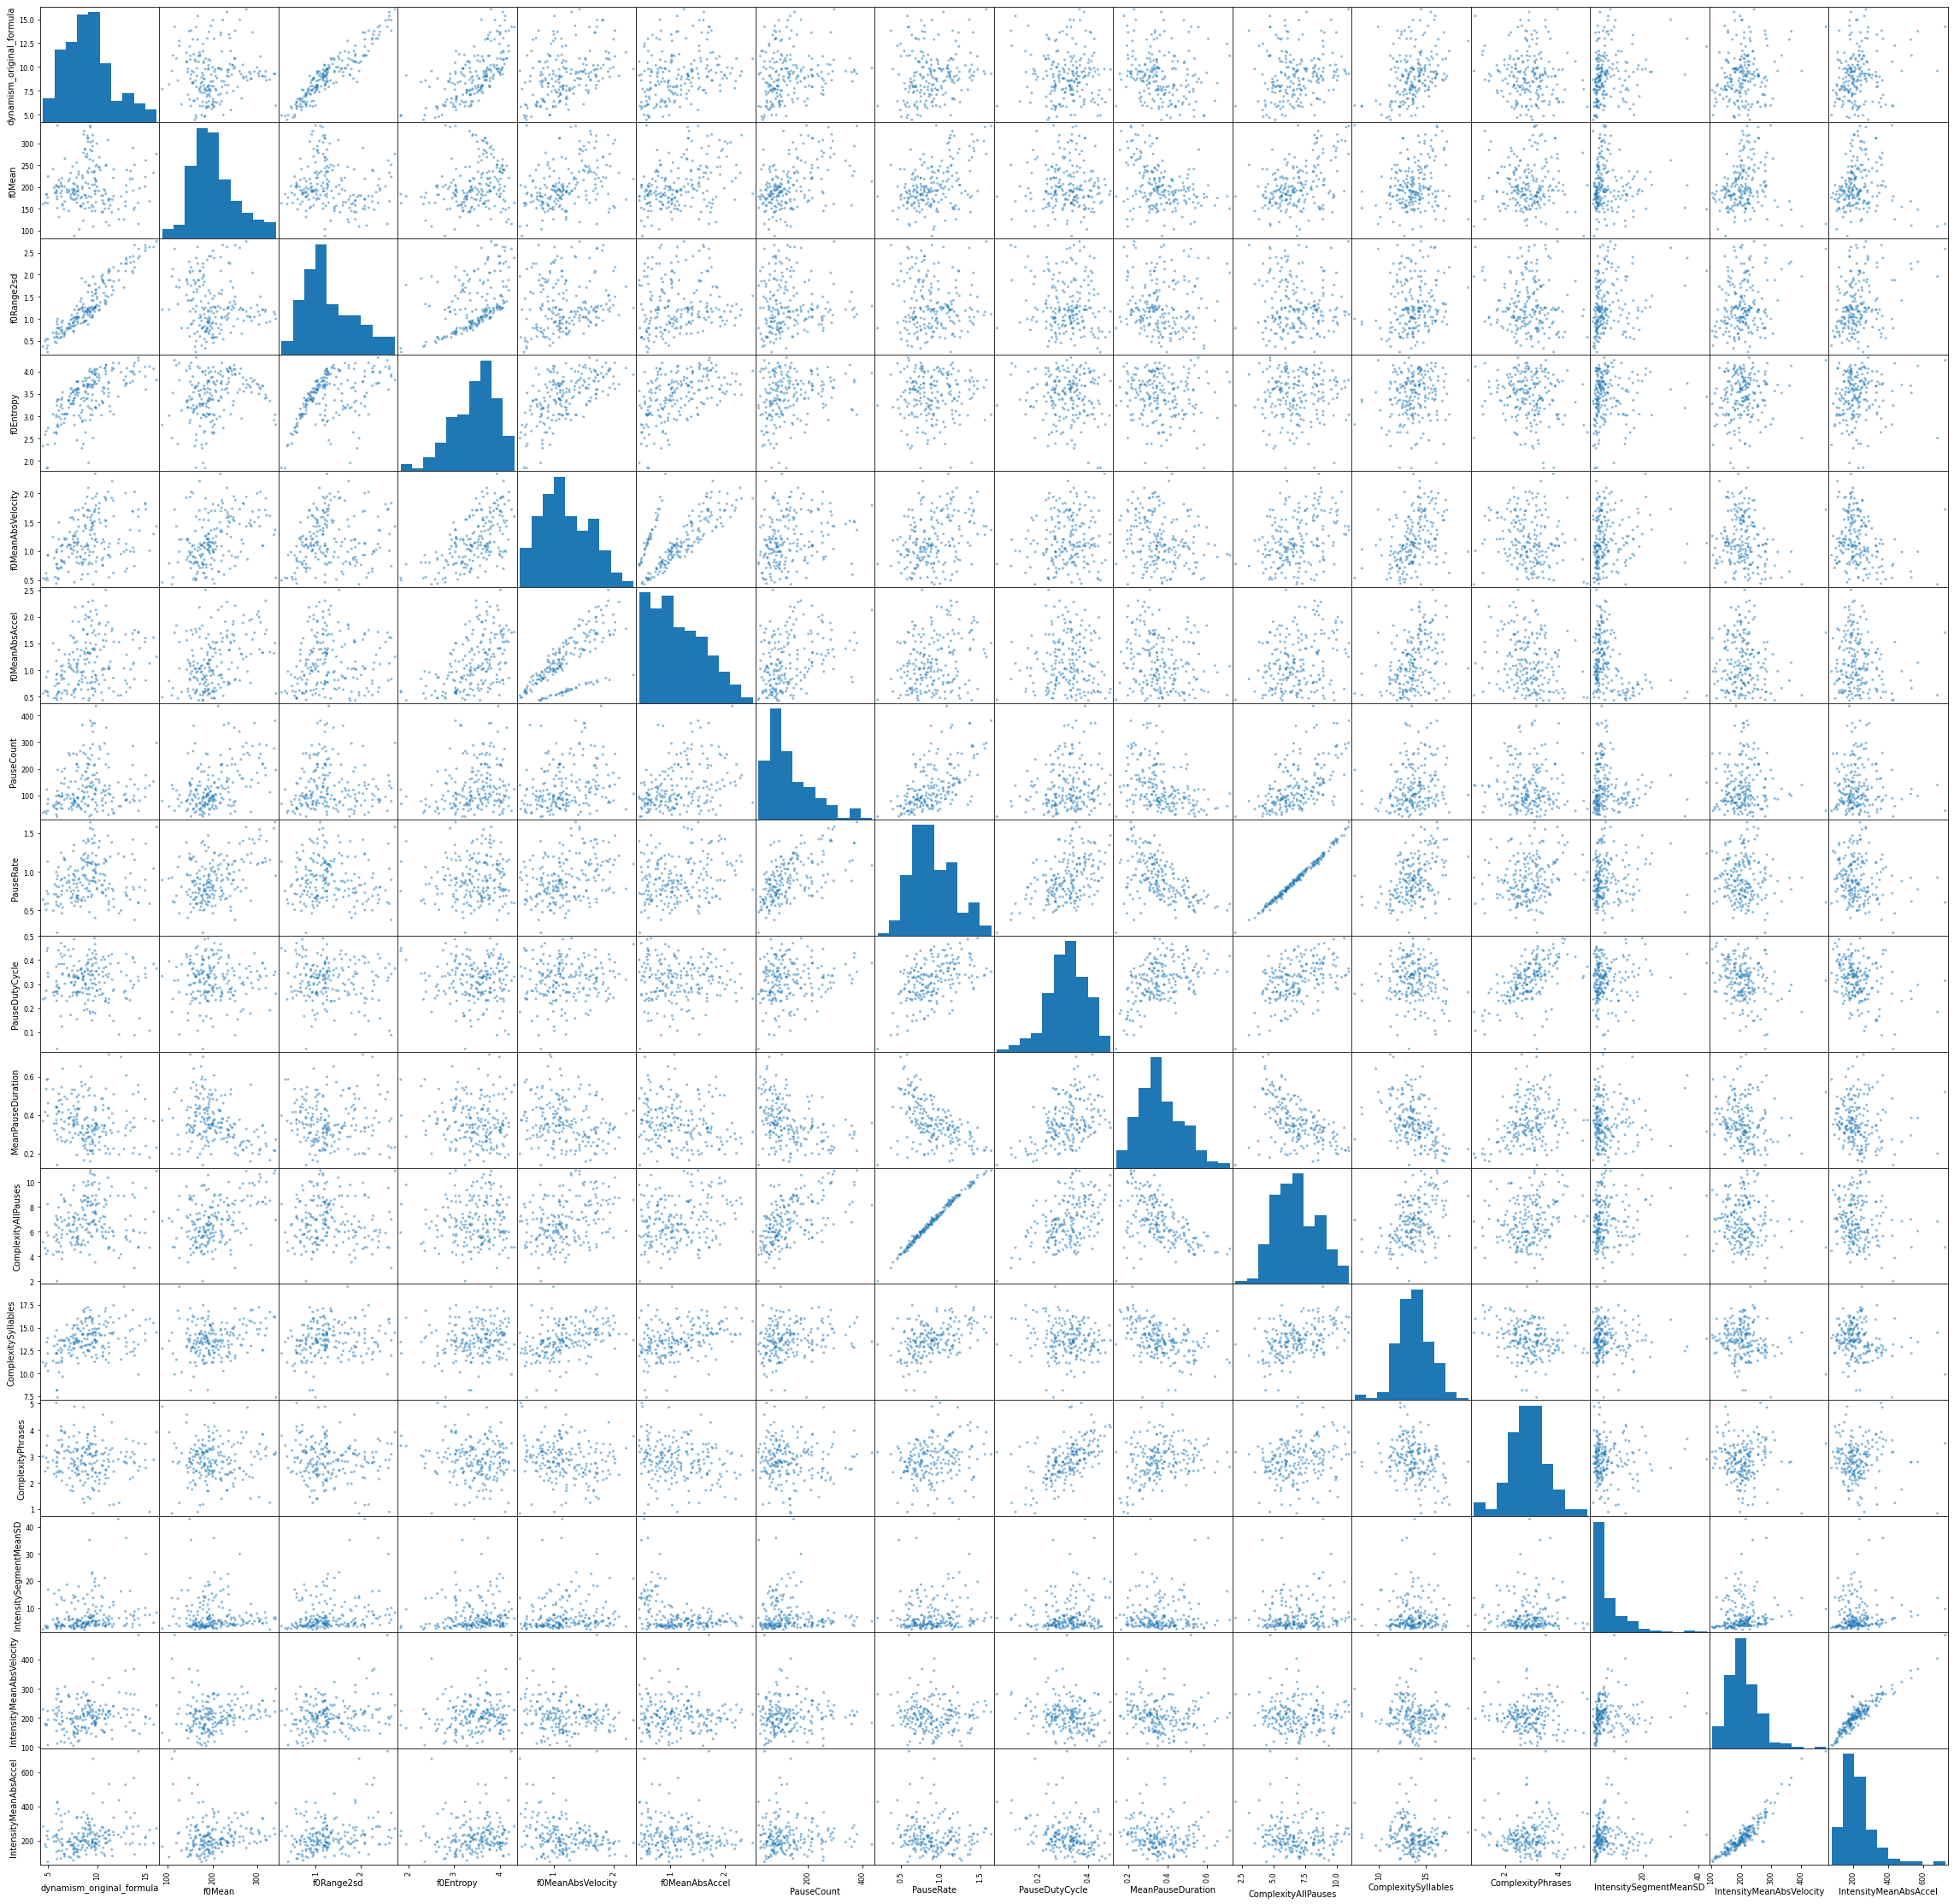

In [6]:
pd.plotting.scatter_matrix(frame=data[measurement_columns], figsize=(40, 40));

In [7]:
# We drop "PauseRate", "f0Range2sd", 'IntensityMeanAbsAccel' from now on in this exploratory analysis.
measurement_columns = measurement_columns.drop(["PauseRate", "f0Range2sd", 'IntensityMeanAbsAccel'])

In [8]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

When we plot'f0MeanAbsAccel' against 'f0MeanAbsVelocity', we see that recordings "naturally" fall into two groups as points can be seperated by an imaginary line. We refer the points below the dashed line as lower group. Recordings in the lower group has smaller 'f0MeanAbsAccel' relative to 'f0MeanAbsVelocity'.

Initially, I tried to characterize poets by examing barcharts of poets' data (eg. spoken words). My hope was to see something like the majority of poets in lower group went to graduate school. However, this may not be appropriate, because some poets have recordings in both groups. Perhaps, checking distribution other prosodic measurements of these two groups may be the right direction. That's why I produced boxplots at bottom. You can also find the poets' name and poems in each group.

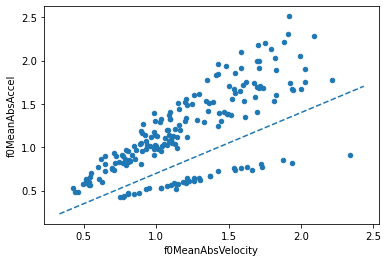

In [9]:
# 'f0MeanAbsVelocity', 'f0MeanAbsAccel' can again seperate data into two groups.
data.plot.scatter(x='f0MeanAbsVelocity', y='f0MeanAbsAccel');
abline(0.7, 0)

Barcharts are exploring if two groups

In [10]:
lower_group_boolean = data['f0MeanAbsAccel'] < data['f0MeanAbsVelocity']*0.7

Recordings in the lower group.

In [11]:
data[["author_last_name", "author_first_name", "poem_title"]].loc[lower_group_boolean]

,author_last_name,author_first_name,poem_title
0,Adams,Samantha,Eartha Lifts her Slip
1,Adams,Samantha,Three Mothers of Gynecology Pry open J Marion ...
12,Bingham-Risher,Remica L.,The Body Speaks
20,Christina,Dominique,Mothers of Murdered Sons
24,Clarke,Cheryl,Brief Interval
25,Clarke,Cheryl,Bulletin
30,Cortez,Jayne,Rape
37,Diggs,LaTasha N. Nevada,The Originator
38,Diggs,LaTasha N. Nevada,Damn Right It's Betta than Yours
59,Girmay,Aracelis,The Woodlice


Recordings in the upper group.

In [12]:
data[["author_last_name", "author_first_name", "poem_title"]].loc[~lower_group_boolean]

,author_last_name,author_first_name,poem_title
2,Adisa,Opal Palmer,Public Restrooms Prelude_Wobj.mat
3,Adisa,Opal Palmer,This Poem Is An Invitation_Wobj.mat
4,Alexander,Elizabeth,Venus Hottentot_Wobj.mat
5,Alexander,Elizabeth,Praise Song for the Day_Wobj.mat
6,Angelou,Maya,Still I Rise_Wobj.mat
7,Angelou,Maya,Phenomenal Woman_Wobj.mat
8,Barnes,Aziza,My Dad Asks _How Come Black Folk Can_t Just Wr...
9,Barnes,Aziza,Aunt Jemima_Wobj.mat
10,Betts,Tara,Erasure_Wobj.mat
11,Betts,Tara,Switch_Wobj.mat


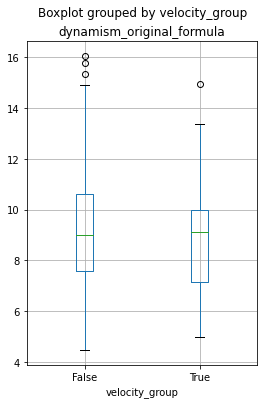

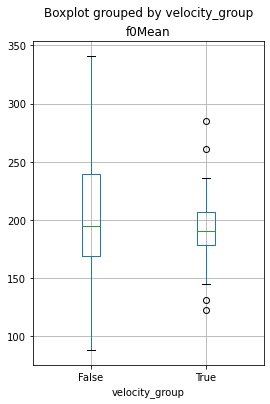

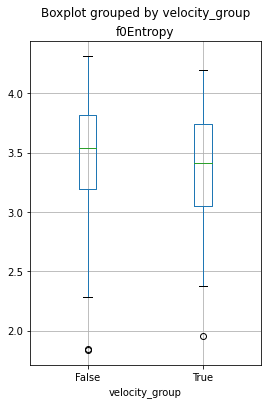

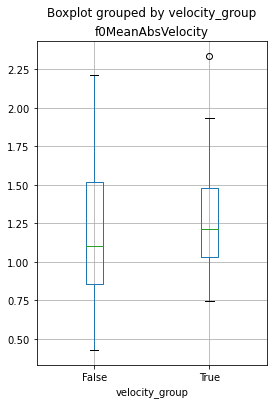

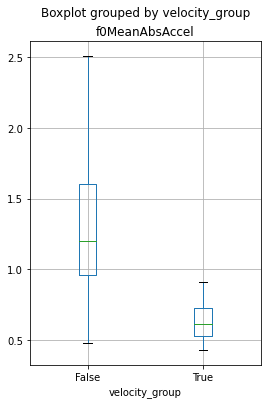

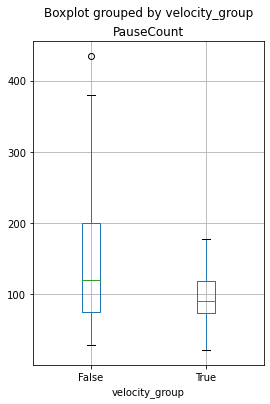

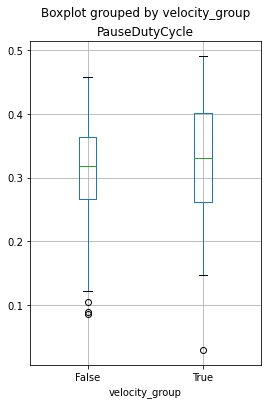

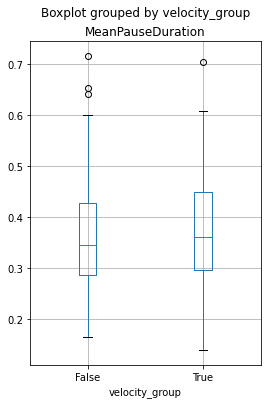

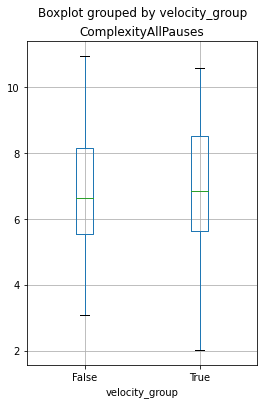

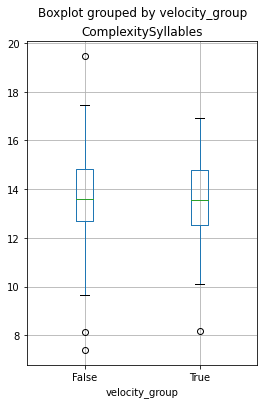

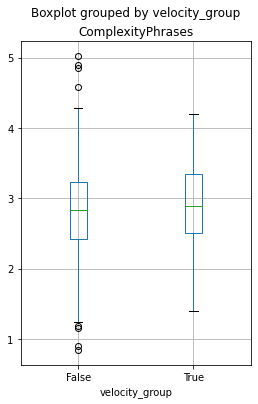

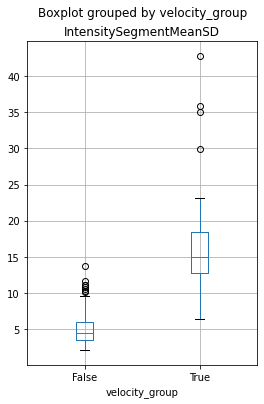

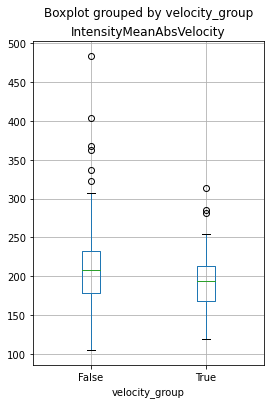

In [13]:
data["velocity_group"] = lower_group_boolean
for column in measurement_columns:
    data.boxplot(column=column, by="velocity_group", figsize=(4, 6));

In [14]:
categorical_feature_list = ['spoken_word', 'cave_canem', 'region', 'undergraduate_school', 'graduate_school',
       'iowa_mfa?', 'private_school', 'ivy', 'hbcu', 'audience', 'poet_laureate',
       'major_award','recording']

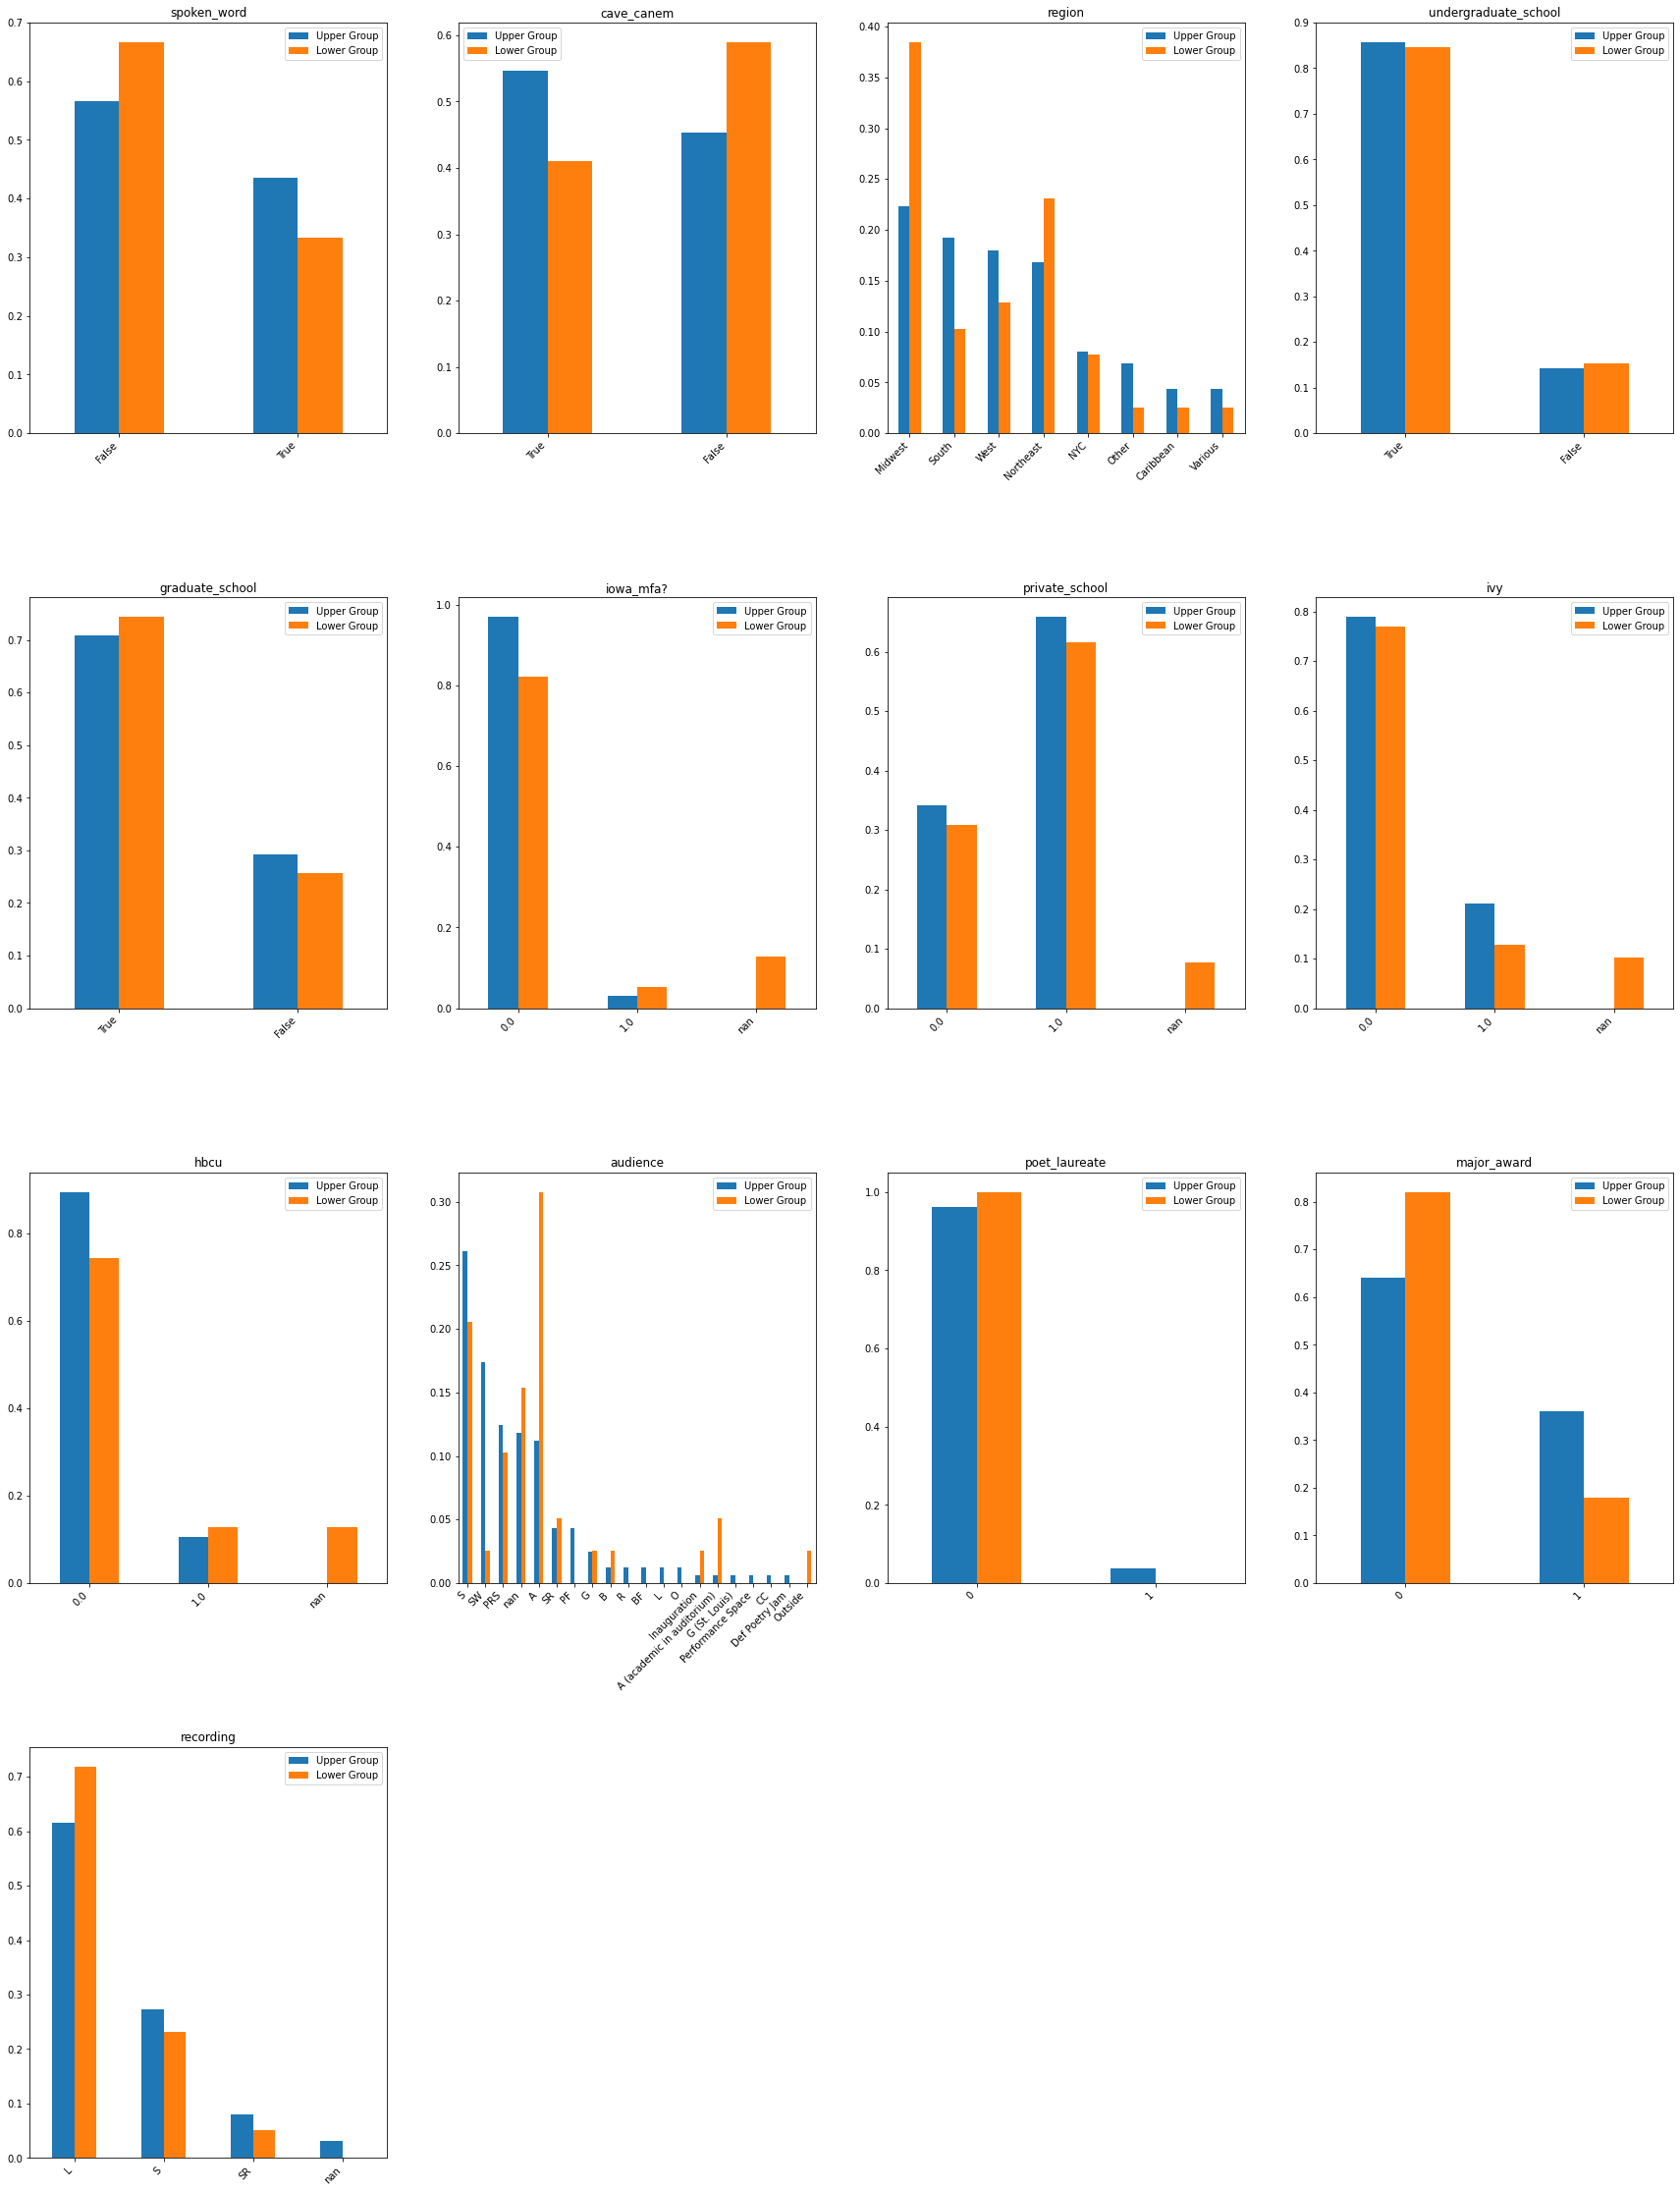

In [17]:
fig = plt.figure(figsize=(30, 40))
fig.subplots_adjust(hspace=0.4)
plot_block = np.int(np.ceil(np.sqrt(len(categorical_feature_list))))
for num, column_name in enumerate(categorical_feature_list):
    column_dict = {}
    for hotzone_boolean, series in data.groupby("velocity_group")[column_name]:
        column_dict[hotzone_boolean] = series.value_counts(dropna=False, normalize=True)
    ax = fig.add_subplot(plot_block, plot_block, num+1)
    pd.concat(column_dict, axis=1).plot.bar(ax=ax)
    plt.xticks(rotation=45, ha="right")
    ax.set_title(column_name)
    ax.legend(["Upper Group", "Lower Group"])

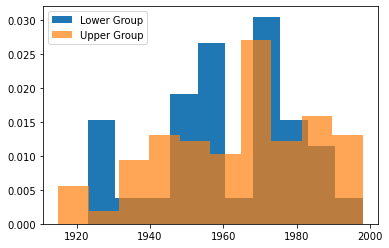

In [28]:
plt.hist(data.loc[lower_group_boolean, "birth_year"], label="Lower Group", density=True);
plt.hist(data.loc[~lower_group_boolean, "birth_year"], label="Upper Group", density=True, alpha=0.7);
plt.legend()

# Compare Recordings from Same Poets
Here is how we compute the distance between two recordings $R_1 = (2.3, 0.2)$ and $R_2 = (1, 0.1)$. $dist(R_1, R_2) = | |2.3 - 1| + | 0.2 - 0.1 | | = | 1.3 + 0.1| = 1.4$ The distance function is called L1-distance also known as Manhattan Distance .

## Scale Data
We scale the data before computing the distance. Since different prosodic measurements can have very different range(eg. 'IntensityMeanAbsAccel' often has values such as 200. Whereas, 'PauseRate' has value around 1), this step just brings all measurements to the same scale so that no signle measurements will dominate the distance because of its scale.

In [30]:
colmean_list = data[measurement_columns].mean()
sd_list = data[measurement_columns].std()

In [31]:
distance_list = []
difference_series_list = []
name_list = []
for name, dt in data.groupby(data.columns[:2].to_list()):
    if dt.shape[0] == 2:
        dt = dt[measurement_columns]
        dt = (dt - colmean_list) / sd_list
        name_list.append(name)
        difference_series_list.append(np.abs(dt.iloc[0, :] - dt.iloc[1, :]))
        distance_list.append(distance.euclidean(dt.iloc[0, :], dt.iloc[1, :]))

In [32]:
difference_dt = pd.DataFrame(difference_series_list, index=name_list)
difference_dt["distance"] = distance_list

In [33]:
difference_dt.head()

,dynamism_original_formula,f0Mean,f0Entropy,f0MeanAbsVelocity,f0MeanAbsAccel,PauseCount,PauseDutyCycle,MeanPauseDuration,ComplexityAllPauses,ComplexitySyllables,ComplexityPhrases,IntensitySegmentMeanSD,IntensityMeanAbsVelocity,distance
"(Adams, Samantha)",1.151084,0.050210,0.010559,0.040533,0.009730,0.529509,1.064195,1.112245,1.921946,0.611019,1.549002,0.082660,0.192025,3.238777
"(Adisa, Opal Palmer)",1.225689,0.351067,1.562914,0.981074,0.720098,1.215463,0.161360,1.232755,0.985009,0.537076,0.135056,0.104266,1.624394,3.535370
"(Alexander, Elizabeth)",0.742199,0.908907,0.280767,0.041316,0.142881,0.012034,2.311974,1.231566,0.633824,1.320943,1.056379,0.081760,0.446085,3.436318
"(Angelou, Maya)",0.545312,0.128554,0.091801,0.547006,0.651634,0.710023,3.473934,3.094948,0.906736,2.556873,2.927584,0.348749,2.073152,6.599039
"(Barnes, Aziza)",2.404290,0.952121,0.940702,0.502395,0.671192,0.661886,0.598823,0.473107,0.990181,0.880350,1.787177,0.260077,1.600453,4.107803


In [ ]:
# difference_dt.hist(figsize=(30, 30));

In [ ]:
# pd.plotting.scatter_matrix(frame=difference_dt, figsize=(40, 40));

This is the distribution of distance between recordings from the same poet. It's diffcult to interpret the number. For example, we don't really have a good idea of the meaning of distance between two recordings being 5 means. That's why it's probably beneficial to look at some examples on both ends.

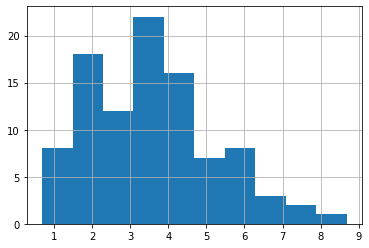

In [38]:
difference_dt["distance"].hist();

Here are three poets of whom the recordings have distance larger then 7.5. You may also see which measurements contributes the difference the most.

In [40]:
large_difference_index = difference_dt.index[difference_dt["distance"] >=7.5]
difference_dt["distance"].loc[large_difference_index]

(Brooks, Gwendolyn)    7.646421
(Harvey, Yona)         8.678416
(Ingram, Tonya)        7.651378
Name: distance, dtype: float64

In [44]:
difference_dt.loc[large_difference_index].iloc[0, :-1].sort_values(ascending=False)

IntensityMeanAbsVelocity     6.738237
ComplexitySyllables          2.507619
f0MeanAbsVelocity            1.187909
f0Mean                       1.113277
dynamism_original_formula    1.094207
IntensitySegmentMeanSD       1.059506
MeanPauseDuration            1.003977
ComplexityAllPauses          0.759293
f0Entropy                    0.355085
ComplexityPhrases            0.254324
f0MeanAbsAccel               0.154756
PauseCount                   0.060171
PauseDutyCycle               0.050746
Name: (Brooks, Gwendolyn), dtype: float64

In [45]:
difference_dt.loc[large_difference_index].iloc[1, :-1].sort_values(ascending=False)

IntensityMeanAbsVelocity     5.383727
ComplexityPhrases            4.626633
PauseDutyCycle               3.534628
f0Mean                       1.887628
MeanPauseDuration            1.603860
dynamism_original_formula    1.336791
ComplexityAllPauses          1.252532
ComplexitySyllables          1.227040
f0MeanAbsVelocity            1.008254
f0Entropy                    0.625752
f0MeanAbsAccel               0.123887
PauseCount                   0.096274
IntensitySegmentMeanSD       0.036441
Name: (Harvey, Yona), dtype: float64

In [46]:
difference_dt.loc[large_difference_index].iloc[2, :-1].sort_values(ascending=False)

ComplexitySyllables          4.619146
f0MeanAbsVelocity            3.588828
f0MeanAbsAccel               2.798482
dynamism_original_formula    2.106174
ComplexityAllPauses          1.979218
IntensityMeanAbsVelocity     1.854511
f0Entropy                    1.631807
PauseDutyCycle               0.853203
PauseCount                   0.722057
f0Mean                       0.678409
MeanPauseDuration            0.445557
ComplexityPhrases            0.364009
IntensitySegmentMeanSD       0.004675
Name: (Ingram, Tonya), dtype: float64

This is the complete list of distance.

In [47]:
difference_dt["distance"].sort_values()

(Dungy, Camille T.)                0.689895
(Kocher, Ruth Ellen)               0.789971
(Francis, Vievee)                  1.246844
(Moss, Thylias)                    1.253734
(Nichelle, Jae)                    1.344723
(Trethewey, Natasha)               1.374659
(Howard, Zora)                     1.382924
(Queen, Khadijah)                  1.486727
(Moon, Kamilah Aisha)              1.499437
(Thomas, Amber Flora)              1.563011
(Martin, Dawn Lundy)               1.590134
(Redmond, Treasure)                1.616050
(Evans, Mari)                      1.689739
(Stewart, Ebony)                   1.712502
(Clark, Tiana)                     1.791157
(Johnston, Amanda)                 1.842075
(Nelson, Marilyn)                  1.866058
(Rollins, Alison C.)               1.881045
(Mans, Jasmine Nicole)             1.904137
(moore, jessica Care)              1.935220
(Madgett, Naomi Long)              1.988391
(Judd, Bettina)                    2.000989
(Elhillo, Safia)                